
# ASSIGNED Cooling a container problem



**This is an exam problem. It is open note, and you may consult the internet. By turning in this problem, you agree that the work is your own, and you did not work with anyone to complete it. Anything else is considered cheating. If you see students working together on this problem, it is cheating and you should report it.**

A small container of liquid are initially at 150 °F.  To cool both the container and the liquid to room temperature (70 °F, the container is immersed in a bath at 32°F.  Balancing the rate of change of energy storage between the liquid and the container with the rate of convective heat transfer (liquid – container and container – bath) leads to a coupled system of equations, where L is the temperature of the liquid and C is the temperature of the container.  Using the parameters given, plot the temperature of the liquid and the container as a function of time.

$\frac{dL}{dt} = \frac{A_i h}{\rho_1 c_{p1} V_1}(C - L)$

$\frac{dC}{dt} = \frac{A_o h}{\rho_2 c_{p2} V_2}(32-C) + \frac{A_i h}{\rho_2 c_{p2} V_2}(L-C)$

||Liquid (1)|Container (2)|
|---
|Mass density [lbm/ft3]|62|139|
|Specific heat [Btu/lbmF]|1.00|0.2|
|Volume [ft3]|0.03|0.003|

$A_i=0.4$ ft<sup>2</sup> and $A_o=0.5$ ft<sup>2</sup>
Assume $h = 8.8$ Btu/hr ft<sup>3</sup> °F




## At what time should the container be removed for the liquid inside it to be at room temperature (70 °F)? What is the temperature of the container at that time?




## Explain qualitatively why the two temperatures profiles look different.




## What will happen to the temperatures after the container is removed from the bath?




## solution



This is a standard system of ordinary differential equations. The easiest way to solve this problem is with an event that terminates when the liquid reaches 70 degrees.



At t=1.10 hours the liquid temperature is 70.0 °F. The container is at 49.1 °F.

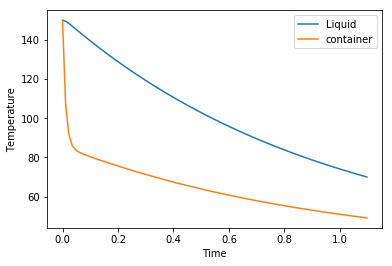

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline
import matplotlib.pyplot as plt

rho1 = 62  # lbm/ft3
rho2 = 139 # lbm/ft3

cp1 = 1    # Btu/lbmF
cp2 = 0.2  # Btu/lbmF

V1 = 0.03  # ft^3
V2 = 0.003 # ft^3

Ai = 0.4 # ft^2
Ao = 0.5 # ft^2

h = 8.8  # Btu/hr ft^{3} °F

def ode(t, Y):
    Y = np.array(Y)
    L, C = Y
    dLdt = Ai * h / (rho1 * cp1 * V1) * (C - L)
    dCdt = Ao * h / (rho2 * cp2 * V2) * (32 - C) + Ai * h / (rho2 * cp2 * V2) * (L - C)
    return dLdt, dCdt

tspan = (0, 2)
teval, dt = np.linspace(*tspan, retstep=True)

Y0 = (150, 150)

def event(t, Y):
    L, C = Y
    return L - 70

event.terminal = True

sol = solve_ivp(ode, tspan, Y0, max_step=dt, events=event, dense_output=True)
plt.plot(sol.t, sol.y.T)
plt.legend(['Liquid', 'container'])
plt.xlabel('Time')
plt.ylabel('Temperature')
te = sol.t_events[0]
le, ce = sol.sol(sol.t_events[0])
print(f'At t={te[0]:1.2f} hours the liquid temperature is {le[0]:1.1f} °F. The container is at {ce[0]:1.1f} °F.')

The container drops in temperature very quickly because it has a very low specific heat, and a very low volume. It also has the largest ΔT to drive the temperature change. On the liquid side, the heat capacity is higher, the volume is larger so its temperature goes down more slowly. The container is lower in temperature because it is in direct contact with the cooling water, whereas the liquid has to lose heat through the container.

Once the container is removed, it will quickly warm up to about 70 degF, and the liquid will cool slightly. At longer time, the whole system will reach room temperature.




### Common mistakes



Many of you inadvertently did something like this:



In [1]:
h = 8.8
teval, h = np.linspace(0, 10)

The problem with this is `h` gets redefined in the second line, so your answers become incorrect. This kind of error is difficult to catch and can only be avoided by using more descriptive (i.e. longer variable names).

Another common issue was in the explanation section. It is not sufficient to simply say the parameters are different. You need to say how they differ, and *why* those differences matter. I can see that the parameters are different, but that does not tell me (or anyone else) why they matter.

